In [1]:
# This is Jupyter version of 'load_profile_utavg.py' for Clinics
# Created 6Apr23
# To calculate average load profile of Clinics based on one-year of data
# All outputs are in Wh (raw data is in kWh but I converted it to Wh for hrly plots)
# check outputs with excel: 'avg_ut analysis PJua'
# see also Jupyter files: 'pjua_hrly_plots_all, 'clinics_load_profile_utavg';
# 'prischools_load_profile_utavg'; 'secschools_load_profile_utavg'

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Clinics (except Chilodi)
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Clinic" in entry) or ("clinic" in entry) or ("dispensary" in entry) \
or ("Dispensary" in entry) or ("Health" in entry) or ("health" in entry)}
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame

,Shakahola Dispensary,Mbulia Dispensary,Werugha Health facility,Sagalla Health Centre,Chingombero Dispensary,Mazola Dispensary,Kavunyalo Dispensary,Isiolo Samburu Complex Dispensary,Boyani Dispensary,Busa Dispensary,Dadacha Basa Dispensary,Mgange Nyika health centre,Saghaighu dispensary,Mabesheni Dispensary,Mgange Dawida Health centre,Mtumwa Dispensary,Mwembe Kati Dispensary,Makamini Dispensary
Timestamp,,,,,,,,,,,,,,,,,,
0,151.647967,63.290286,180.012798,224.015684,62.761731,71.682197,186.659305,84.037428,122.684967,111.741292,141.490726,107.566590,106.309431,146.934530,105.532304,156.422101,108.342018,45.920174
1,139.703421,63.462914,165.566061,216.127877,62.499525,70.303629,185.709950,86.933462,126.738371,112.037684,133.835216,108.063266,108.008262,141.721255,106.773364,155.352920,107.121016,45.004724
2,148.923554,62.717187,160.894931,192.320710,62.547375,69.848442,189.261275,90.732935,127.303863,115.502500,122.860323,99.800873,106.415668,143.029229,102.838325,154.830314,105.183602,45.489657
3,141.871612,61.778733,159.130804,159.294955,63.307945,69.217680,187.483496,82.965177,125.754316,115.783350,114.285589,100.309704,107.526804,156.350062,96.547932,154.790105,106.321574,45.896758
4,145.252068,62.464465,167.407464,188.646288,63.807187,67.305628,187.990321,77.109709,126.456908,116.512605,108.061146,103.116568,105.658081,161.275707,102.000867,162.434128,100.873571,46.196270
5,141.781372,59.704447,141.042505,178.179216,63.990887,66.003771,198.522890,80.095134,118.861701,118.023413,124.268535,75.976566,104.092270,177.266101,97.990836,204.217689,104.536575,45.476224
6,90.170760,26.052566,79.302912,103.546245,45.350237,53.913505,116.322376,78.171080,93.611929,107.766316,138.913863,18.144632,83.313337,99.632673,38.000484,211.675889,102.343976,44.262347
7,75.290268,18.613492,105.404856,60.223214,42.392454,47.975001,75.525440,77.616204,88.229304,78.284262,132.090581,22.476863,83.447231,78.974437,40.886337,113.549179,98.651705,43.673401
8,74.759322,16.728825,102.067136,70.333430,75.841137,45.359625,75.645624,86.190225,89.211073,69.372412,127.598608,36.786290,104.676813,79.712760,47.867401,91.056952,104.489383,43.402876


In [3]:
# ^is the df with the average utilisation per hour based on one-year of measured data
# from HB's code output. 

# Export df to check mean and std
# results_frame.to_csv("clinics_avg_30Mar.csv") 
# this is the file I exported back when I did it on Spyder to analyse data for thesis draft

# Setting to plot
sns.set(rc={"figure.dpi":300})
# sns.set_palette("colorblind", n_colors=len(filenames))
sns.set_context("notebook")
sns.set_style("whitegrid")

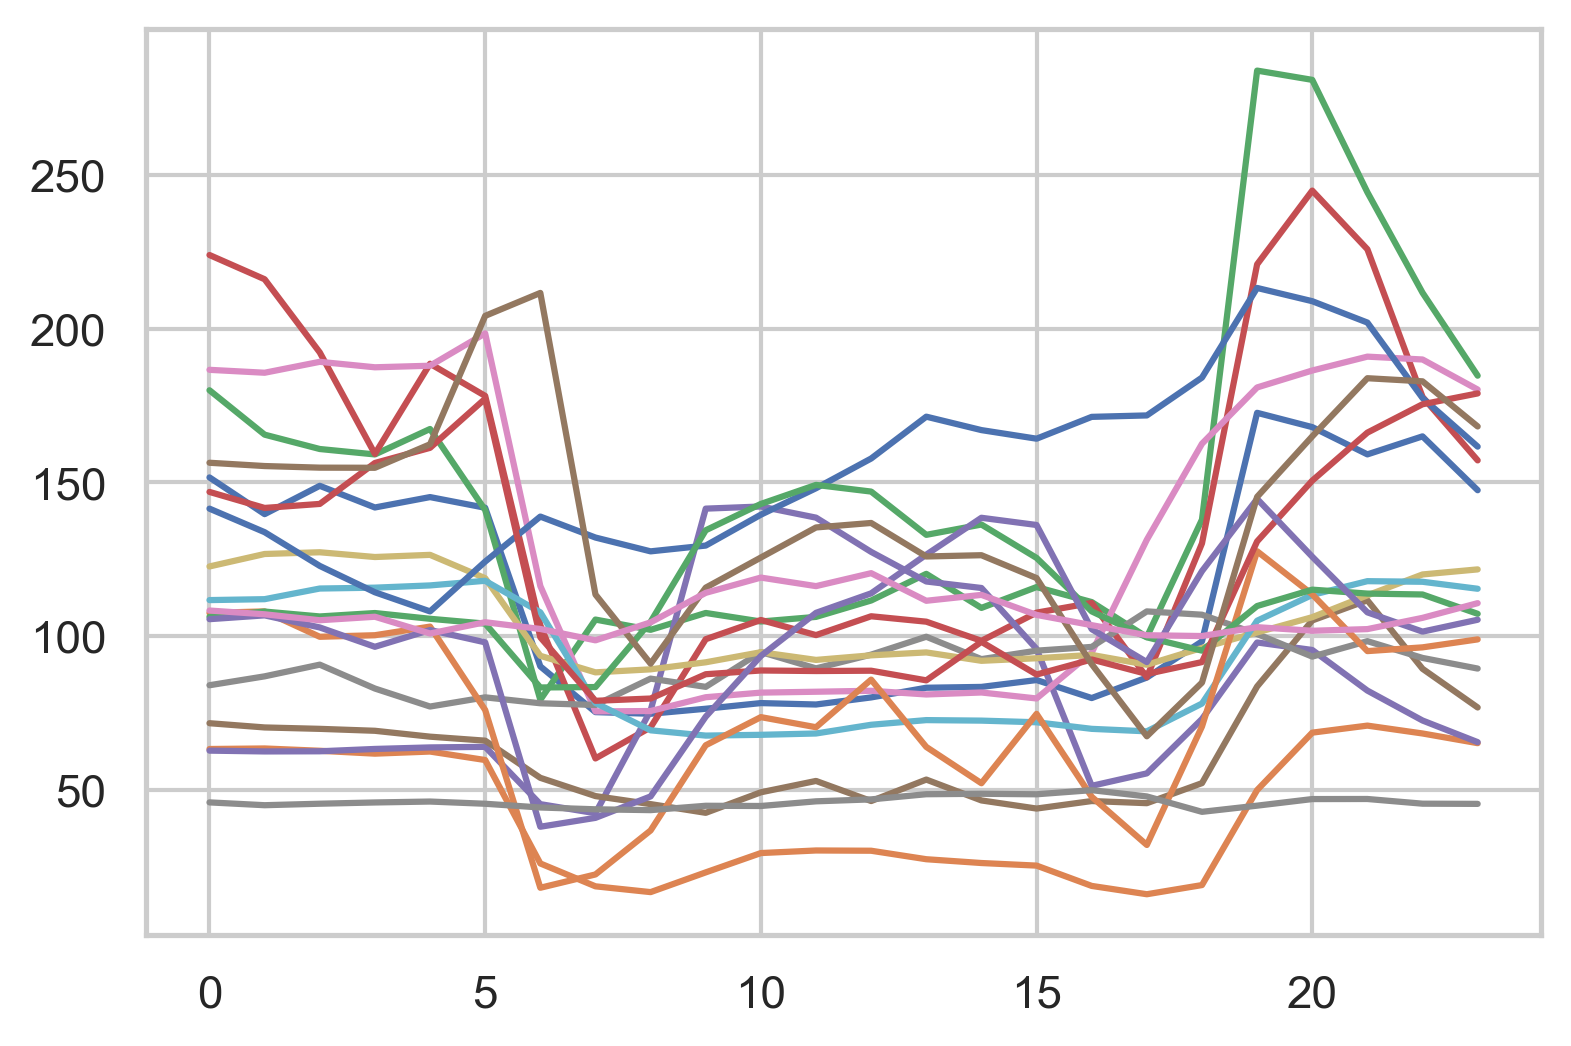

In [4]:
# Plot all sites together
plt.plot(results_frame)

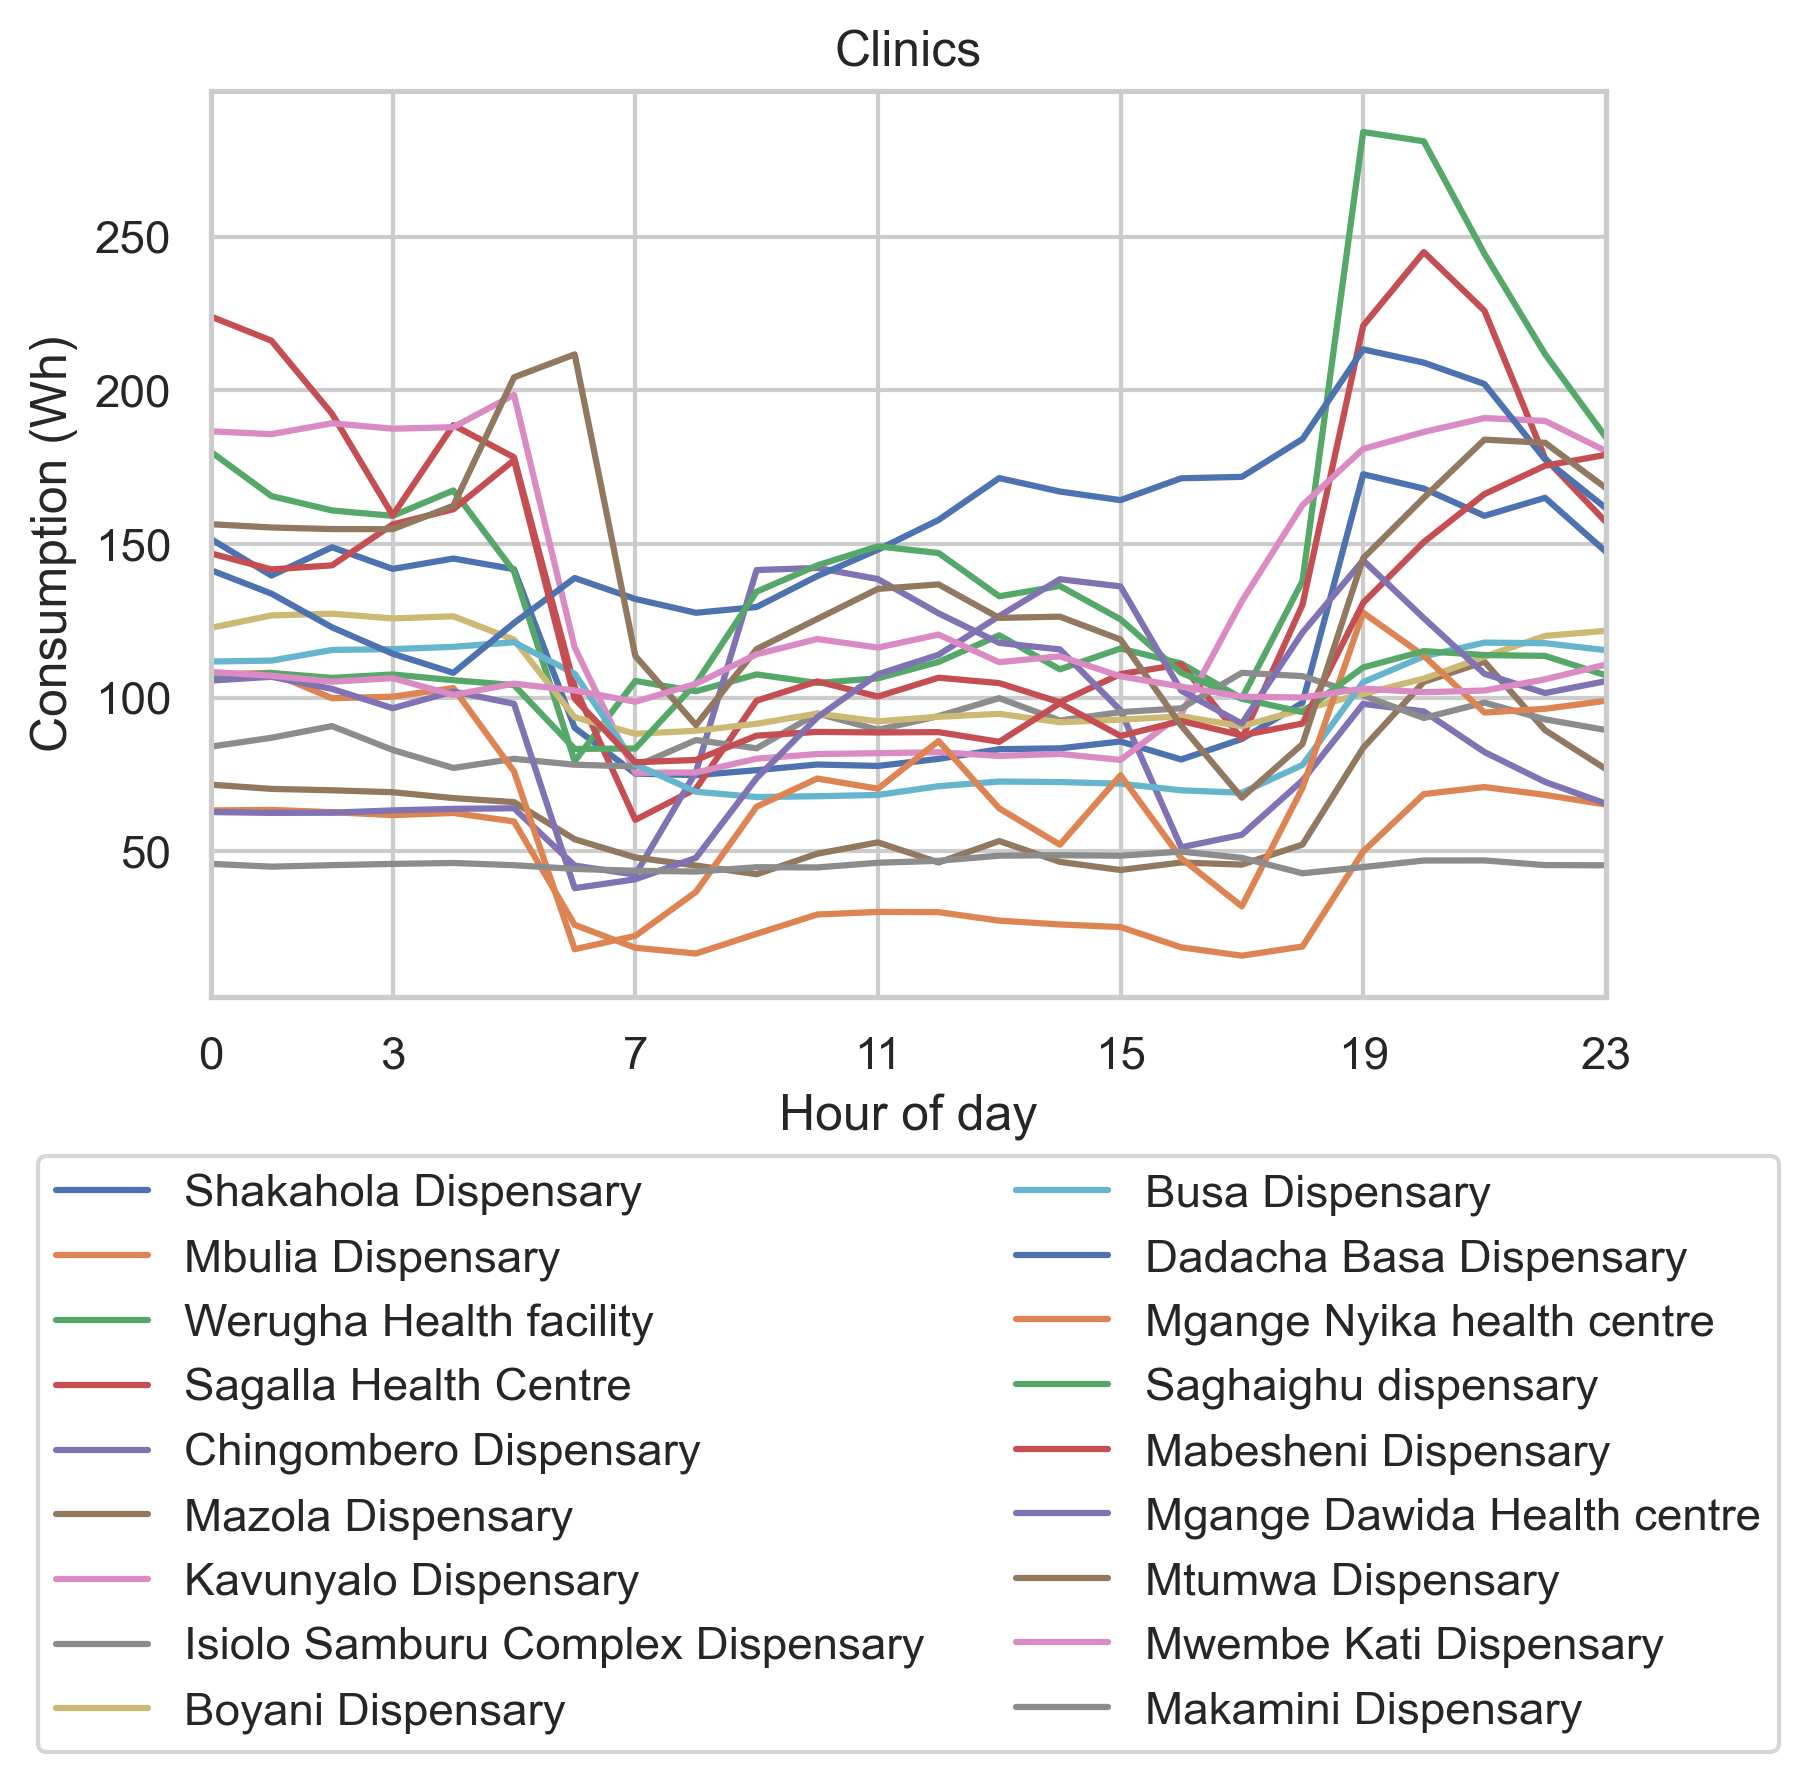

In [5]:
# Plot it with format
plt.plot(results_frame, label=results_frame.columns)  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Clinics")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# improve: set different palette so colours don't repeat

In [6]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites  # to show in Jupyter

,Mean,Std_dev
Timestamp,,
0,120.947307,47.733451
1,118.609051,44.936003
2,116.694487,42.549069
3,113.812033,40.117105
4,116.253832,44.311741
5,116.668341,48.756615
6,85.027507,45.919381
7,71.294679,31.019380
8,74.505550,28.050318


In [7]:
all_sites.round(2)  # to know peak utilisation

,Mean,Std_dev
Timestamp,,
0,120.95,47.73
1,118.61,44.94
2,116.69,42.55
3,113.81,40.12
4,116.25,44.31
5,116.67,48.76
6,85.03,45.92
7,71.29,31.02
8,74.51,28.05


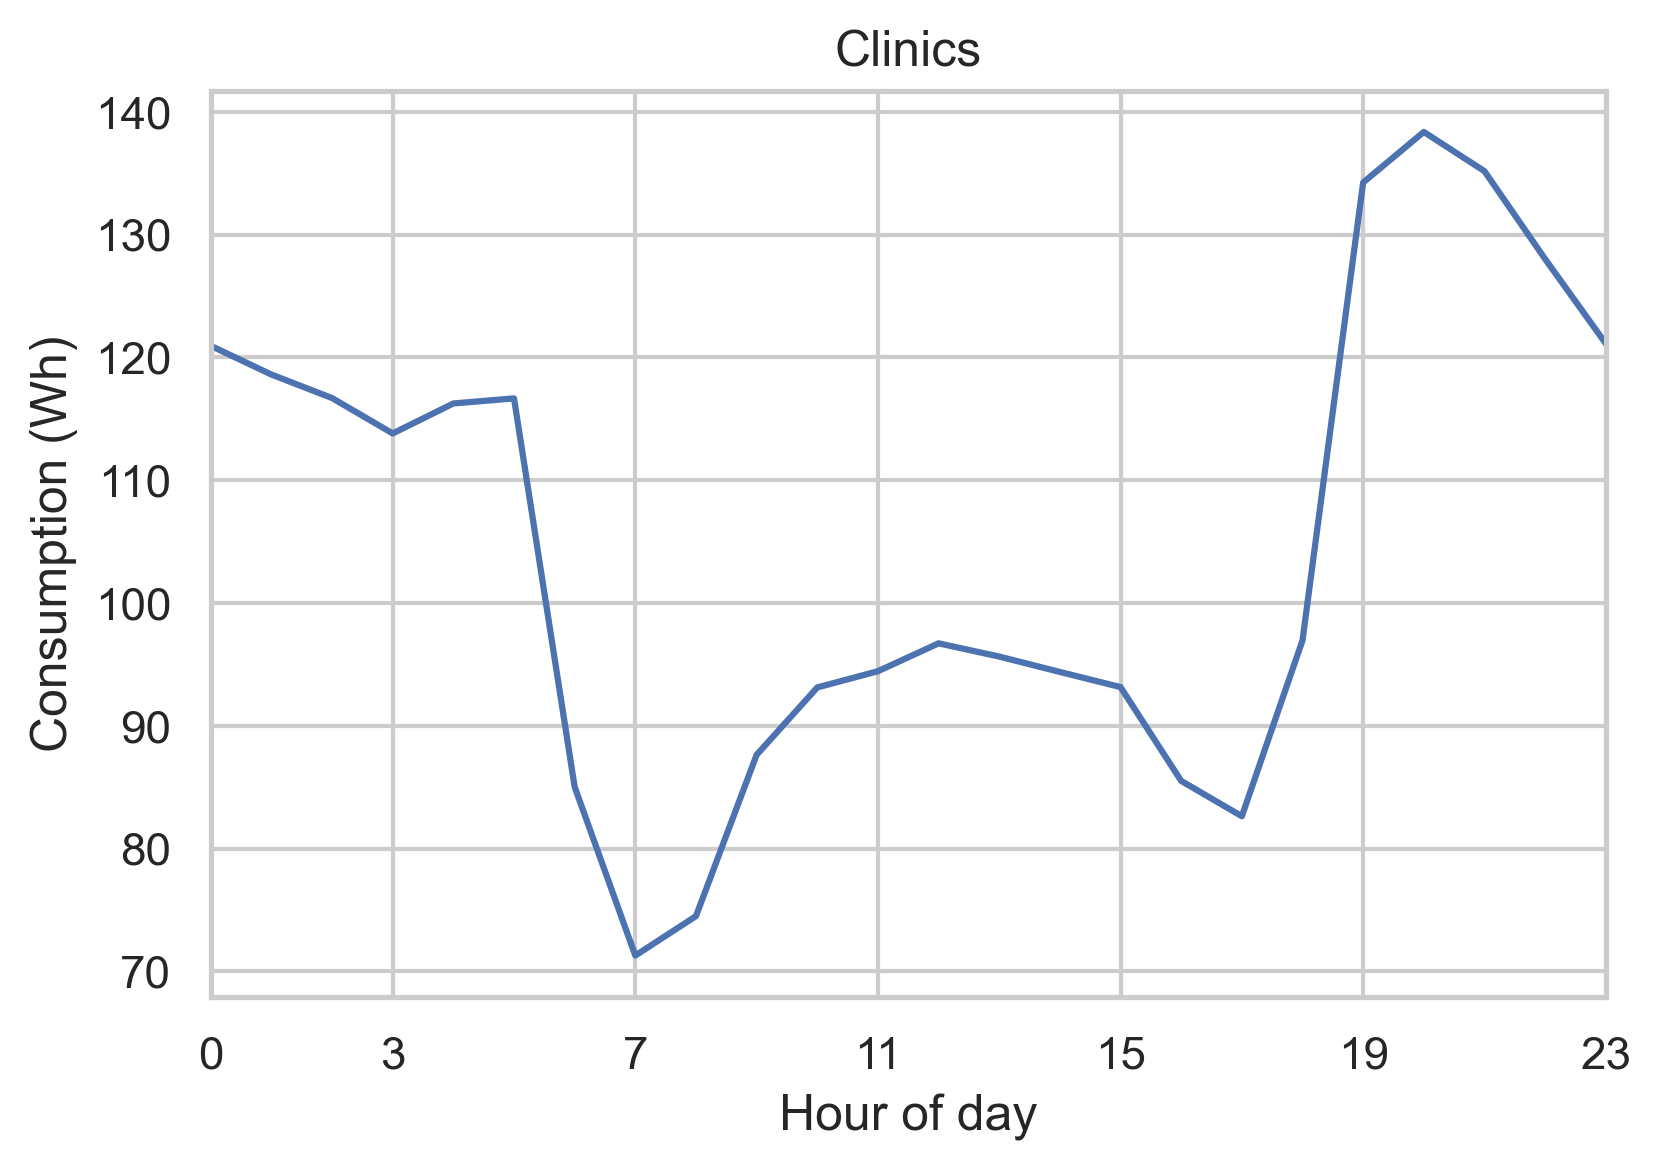

In [8]:
# Plot Mean consumption all sites
#sns.lineplot(data=hrly)
plt.plot(all_sites["Mean"])  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Clinics")
plt.show()

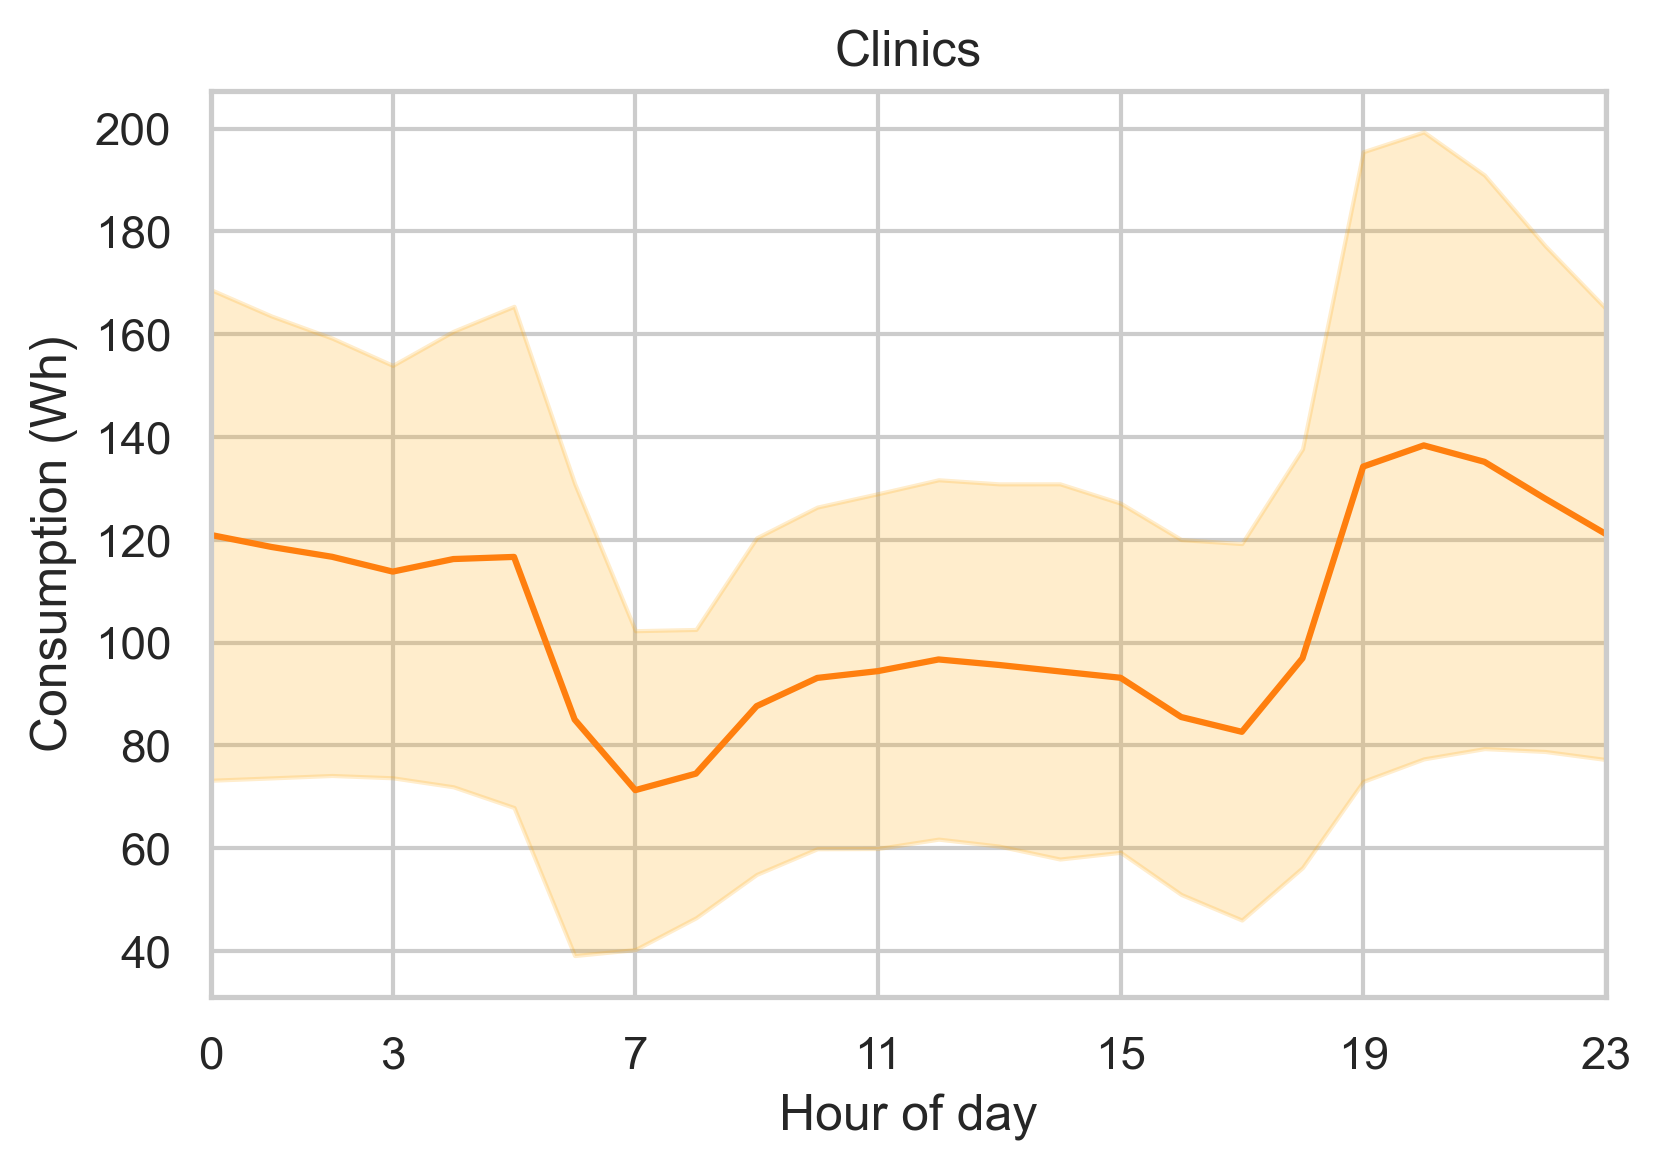

In [9]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:orange", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="orange",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Clinics")
plt.show()

In [10]:
# For another format style option
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")

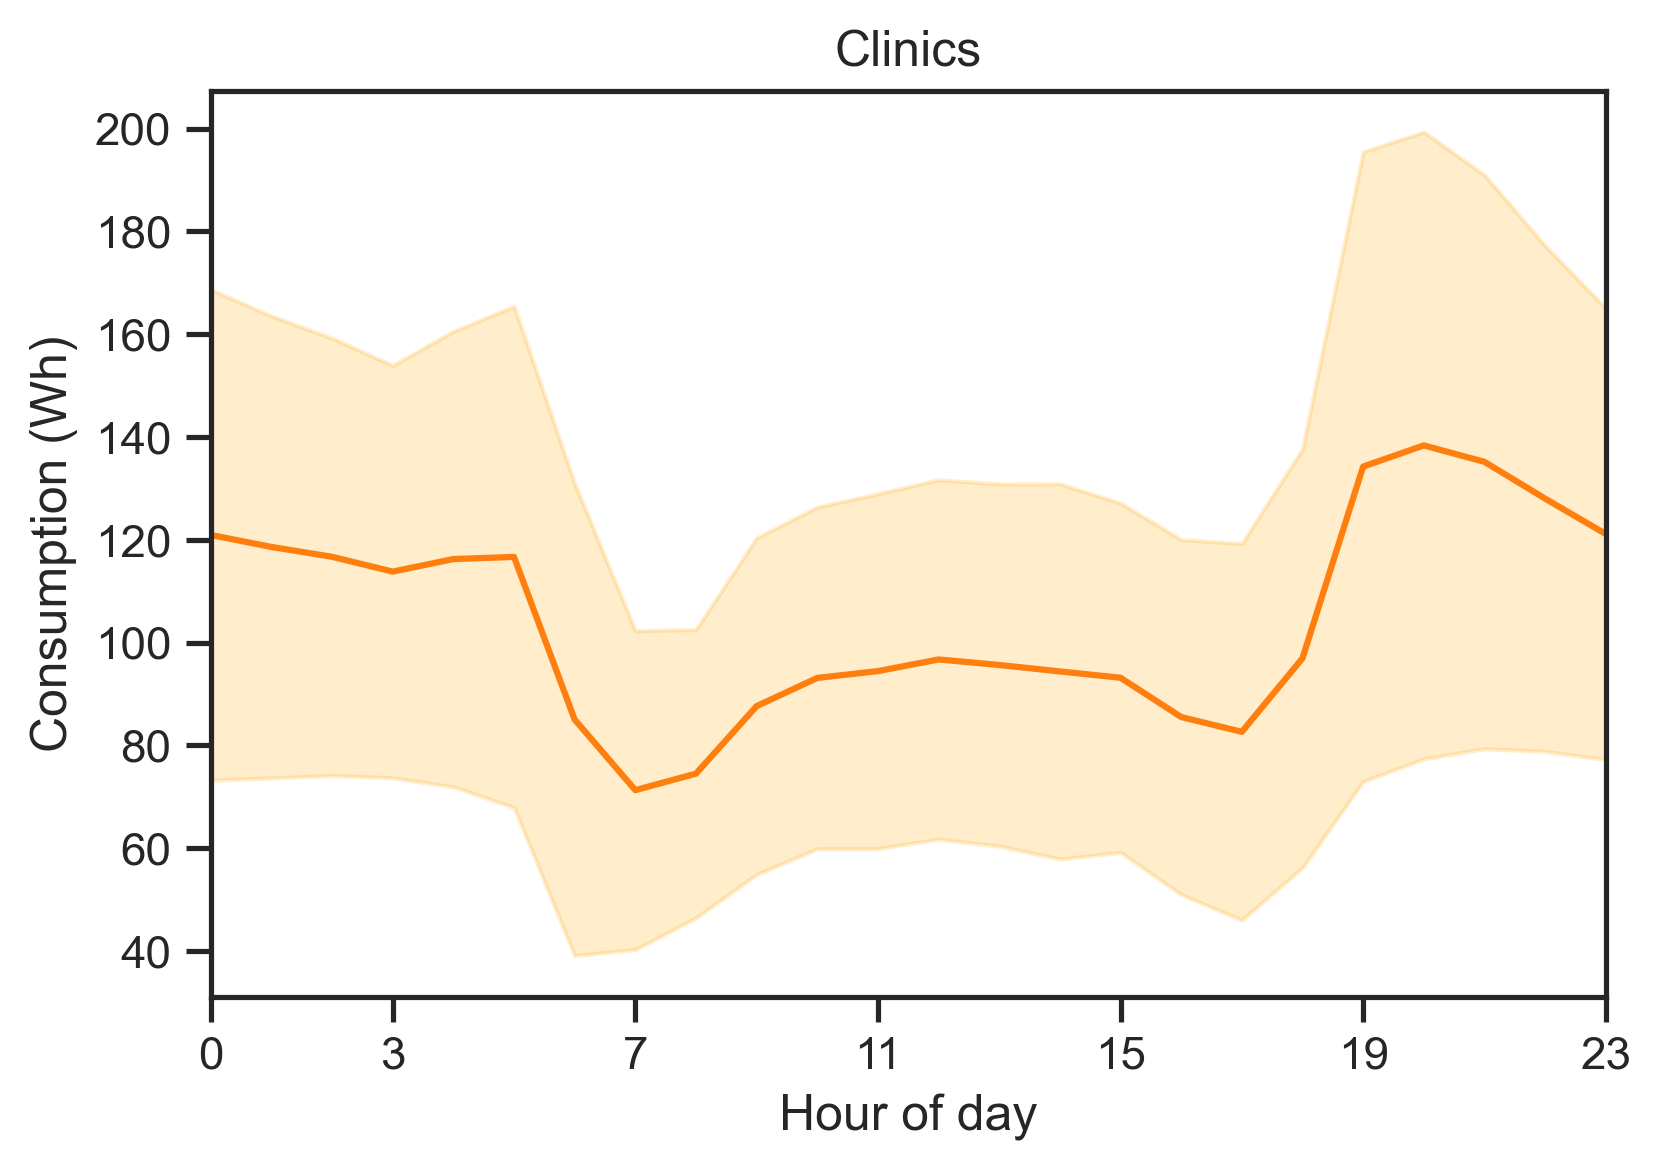

In [11]:
# Repeat above plot
# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="tab:orange", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="orange",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Clinics")
plt.show()

In [12]:
# To calculate average daily utilisation (all is in Wh)
avg_daily = results_frame.sum().to_frame()

# Rename column name of df
avg_daily.rename(columns = {0:"Avg_daily"}, inplace = True)

avg_daily.round(2)  # to show in Jupyter

,Avg_daily
Shakahola Dispensary,2751.36
Mbulia Dispensary,1003.62
Werugha Health facility,3591.18
Sagalla Health Centre,3469.18
Chingombero Dispensary,2015.05
Mazola Dispensary,1507.25
Kavunyalo Dispensary,3288.69
Isiolo Samburu Complex Dispensary,2179.74
Boyani Dispensary,2513.99
Busa Dispensary,2223.75


In [14]:
# Get stats of average daily values (all sites)
avg_daily.describe().round(2)
# this are values I used in draft to describe utilisation on an average day for all clinics

,Avg_daily
count,18.00
mean,2510.99
std,814.93
min,1003.62
25%,2056.22
50%,2540.65
75%,3187.49
max,3711.85


In [15]:
# To convert to kWh
avg_daily_kwh = avg_daily.div(1000)
avg_daily_kwh.round(2)  # to show in Jupyter

,Avg_daily
Shakahola Dispensary,2.75
Mbulia Dispensary,1.00
Werugha Health facility,3.59
Sagalla Health Centre,3.47
Chingombero Dispensary,2.02
Mazola Dispensary,1.51
Kavunyalo Dispensary,3.29
Isiolo Samburu Complex Dispensary,2.18
Boyani Dispensary,2.51
Busa Dispensary,2.22


In [ ]:
# See 'load_profile_utavg.py' for code to re-check outputs for peace of mind if needed
# or for other ways of plotting or calculating data with a different format output 
# this are the plots/values I used in thesis draft Ch. 4 (sent on 3Apr23). 
# Just copy and paste them in word or ppt and then word if it doesn't work.
# Maybe save plots at some point. 
# If i need to rerun it DON'T export csv unless something in the data needs to change in future. 